Sample counts per category:
  falldown: 49
  shaking: 80
  downstair: 20
  jogging: 20
  walking: 20
  upstair: 20
Data shape: (209, 104, 6)
Unique labels: [0 1 2 3 4 5]
Flattened data shape: (209, 624)
LDA-transformed shape: (209, 2)


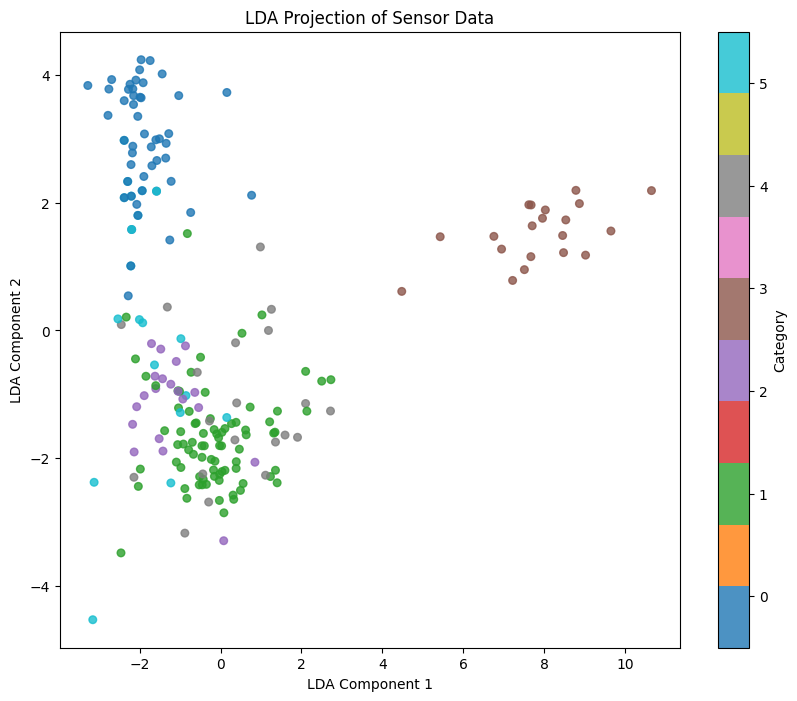

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from data_loader import load_all_data, LABEL_MAPPING

# Load the full dataset (all files are trimmed to the same number of rows)
data_dir = "./dataset/train"  # adjust this path as needed
data, labels, scaler = load_all_data(data_dir)
print("Data shape:", data.shape)  # Expected shape: (n_samples, time_steps, n_features)
print("Unique labels:", np.unique(labels))

# Flatten each sample so that LDA can work on a 2D array (n_samples, n_features)
n_samples, time_steps, n_features = data.shape
X_flat = data.reshape(n_samples, -1)
y = labels
print("Flattened data shape:", X_flat.shape)

# Apply LDA to reduce dimensions to 2 components for visualization
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_flat, y)
print("LDA-transformed shape:", X_lda.shape)

# Plot the LDA projection as a scatter plot, coloring by category
plt.figure(figsize=(10, 8))
categories = list(LABEL_MAPPING.keys())
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap="tab10", s=30, alpha=0.8)
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection of Sensor Data")
plt.colorbar(scatter, ticks=range(len(categories)), label="Category")
plt.clim(-0.5, len(categories)-0.5)
plt.show()
